In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
seed = 739

# Обработка данных

## Загрузка данных

In [3]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
# cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [4]:
years = sorted(train_df["year"].unique())
churn_average = train_df.groupby("year")["churn"].sum().values
users_per_year = train_df.groupby("year")["churn"].count().values

График зависимости количества ушедших клиентов от года

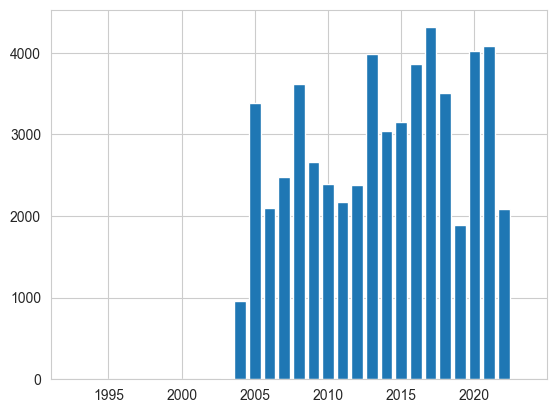

In [5]:
import matplotlib.pyplot as plt


plt.bar(x=years, height=churn_average)
plt.show()

График зависимости количества неушедших клиентов от года

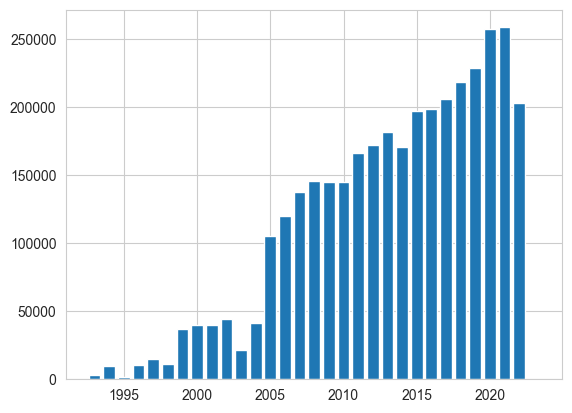

In [6]:
plt.bar(x=years, height=(users_per_year - churn_average))
plt.show()

Берем данные только с 2003 года

In [7]:
train_df = train_df.loc[train_df['year'] >= 2003]

In [8]:
train_df['year'].min()

2003

In [9]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
# display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


## Просмотр данных

In [10]:
display(train_df.info())
# display(trnsctns.info())
# display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3377386 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64
 22 

None

## Добавление новых столбцов

In [11]:
currency_df = pd.read_csv('external_data/currency.csv')
GDP_df = pd.read_csv('external_data/GDP.csv')
inflation_df = pd.read_csv('external_data/inflation.csv')
unemployment_df = pd.read_csv('external_data/Unemployment.csv')

In [12]:
display(GDP_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  84 non-null     object 
 1   GDP      84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


None

In [13]:
for i, quarter in tqdm(enumerate(currency_df.loc[:, 'quarter'])):
    train_df.loc[train_df['quarter'] == quarter, 'currency'] = currency_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'GDP'] = GDP_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'inflation'] = inflation_df.iloc[i, 1]
    train_df.loc[train_df['quarter'] == quarter, 'unemployment'] = unemployment_df.iloc[i, 0]
train_df.head(5)

84it [01:20,  1.05it/s]


,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
0,1,0xA095932790098744A2325A8D152C05C7,0xD4DBBAC6561929409BA45725A220613E,1,2,2017,2017Q4,1,48,8091,...,САМАРСКАЯ ОБЛ,-1,-1,0,0,0,58.402211,25621.2,2.583333,5.07
1,0,0xF75BAA20A603A2479005DEB80464336E,0x3DCFF11974B3D8458CE3569DE9E855D5,2,2,2009,2009Q1,1,35,3303,...,ЛИПЕЦКАЯ ОБЛ,-1,1,0,1,0,34.392777,8334.6,13.726667,8.87
2,2,0x0D18081E0556AF4F95A931FBA4159D52,0x9DADF88CB3407C4E89403315F640393E,1,1,2010,2010Q1,1,47,1163,...,ОРЛОВСКАЯ ОБЛ,1,1,0,1,0,29.842293,9995.8,7.220000,8.67
3,0,0x0AD72BC5475D9A4D83E12350A84F839D,0xF59C4E62F115684899EAE9B5D5ECF70F,1,1,2005,2005Q4,-1,42,47,...,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0,28.713011,6228.1,11.286667,7.00
4,0,0x73DF06339CC25840838408BAD52BE223,0x35BFFA05321C014B9FC29A189E89EDF0,2,2,2007,2007Q4,1,42,876,...,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,0,24.648172,9797.0,11.396667,5.80


## Обработка пропущенных данных

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

In [14]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0,30.415821,16370.0,7.123333,5.83
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0,76.203011,31230.5,4.436667,6.10
244,1,0x2264D51A1838844E8A01D150793CFFB6,0x8703B083DEBA674695B1099E651A03F1,1,2,2004,2004Q1,-1,40,2374,...,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0,28.627820,3515.7,10.703333,8.77
329,1,0x6A696B387083DB49AC8F435F80551DD4,0xF1E63A6D40734945A0FDB1AA16D06817,1,2,2014,2014Q1,-1,62,6783,...,САМАРСКАЯ ОБЛ,1,-1,0,0,0,35.143616,17311.4,6.390000,5.53
513,1,0x5BCE8B25387D3540968444811F3A1BFE,0xE47B19BF91AAEE43BEEF1AD84611ABB9,1,2,2011,2011Q1,-1,53,4954,...,САНКТ-ПЕТЕРБУРГ Г,1,-1,0,0,0,29.163959,13024.8,9.496667,7.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589356,1,0x9709AD2C1655C04F8BB849D57EC77CD5,0x4AD22502210180469AF926CA7608DA38,1,2,2013,2013Q1,-1,42,5676,...,КОМИ РЕСП,1,-1,0,0,0,30.415821,16370.0,7.123333,5.83
3589430,1,0x4F8F361FA9D4A54898EDFAC7AEDE9074,0x1A67F7F07ADCDA4C8E6F8BB43AB3FED2,1,2,2016,2016Q4,1,49,6884,...,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0,62.980128,24043.6,5.743333,5.37
3589487,1,0xA1C282E4166ED146AB84414654531D98,0x3E273D876E3AAD458653B92984A8E492,1,2,2021,2021Q4,1,56,8803,...,ВОЛОГОДСКАЯ ОБЛ,1,-1,0,0,0,72.654305,40111.5,8.310000,4.30
3589599,1,0xE55F21DD252F5F4D9F21C705BB263309,0xA2F3BD5DC3782B49BBBB9BE438C3C37D,1,2,2015,2015Q4,1,80,6395,...,КУРСКАЯ ОБЛ,1,-1,0,0,0,66.052642,23079.8,14.493333,5.70


In [15]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0,47.553931,22130.5,9.576667,5.20
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0,47.553931,22130.5,9.576667,5.20
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0,31.079048,18768.9,6.533333,5.13
32913,1,0xA300B8F39716DD44A1797F982CFBEA1B,0x97200DA97B3DFC498C664B6E5F2B5168,1,2,2010,2010Q1,-1,55,4635,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,29.842293,9995.8,7.220000,8.67
39009,2,0x5BF4871F3B605940BF10FB78DB8D8F38,0xAB3B92B38CEA6B479A7E3A4C9E224620,2,1,2021,2021Q4,1,37,5346,...,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0,72.654305,40111.5,8.310000,4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,58.402211,25621.2,2.583333,5.07
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,САМАРСКАЯ ОБЛ,1,1,0,1,0,87.347863,36398.5,11.533333,4.20
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0,66.517628,29220.6,3.883333,4.77
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0,30.716354,13249.3,8.113333,6.77


Вычислим регионы по почтовым индексам

In [16]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {str(code)[-3:]: region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [17]:
dict_["0"] = np.NAN
list_ = []

for i, row in buffer.iterrows():
    code = str(row['postal_code'])[-3:]
    list_.append(dict_[code])

train_df.loc[train_df.loc[:, 'region'].isna() & train_df.loc[:, 'postal_code'].notna(), 'region'] = pd.Series(list_)

In [18]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
179,0,0xCDC5031E97872845A7B84E4A672CB6D7,0x844F25196F78134B9B32E06D6C377E87,1,1,2010,2010Q3,1,58,3734,...,NaN,-1,-1,0,1,0,30.618964,12086.5,6.153333,6.67
301,0,0x4CCF461FFCED7948BCFCA3D0E6631F4B,0x105D7DF015BFE540B0B044BA1C25A0C2,1,2,2006,2006Q3,1,55,2669,...,NaN,-1,-1,0,1,0,26.805697,7275.8,9.440000,6.73
349,0,0x3BD5BA047DC4F94E95B926564D190955,0xA343B4FD6667E546BF177B4D8B467994,1,2,2005,2005Q1,1,27,1940,...,NaN,-1,-1,0,1,0,27.854109,4458.6,13.096667,7.80
356,0,0x18A67B35EA569842A696521BBBEA7CFB,0x6815EF1CAB03E44DB6A7ECD8F65729C1,1,2,2004,2004Q4,1,30,1510,...,NaN,-1,-1,0,1,1,28.519670,4945.9,11.656667,7.80
430,0,0x5A6212B18810D149A6E5C5144B072B4C,0xE8FAF77410253C4FA0252094E715C86A,1,2,2005,2005Q1,1,60,2121,...,NaN,-1,-1,0,1,0,27.854109,4458.6,13.096667,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589855,0,0xD9C0B98EAC90434C809BF7FCCAE6D0B1,0x522F0039600CEE44B5FB0C47E3436AE0,1,2,2007,2007Q4,1,29,721,...,NaN,-1,-1,0,1,1,24.648172,9797.0,11.396667,5.80
3589861,0,0x629D926F2F0BE146B6CF85E76DF99B67,0x5705A6AB4E5FCE46872A9B7BA54A0726,2,2,2005,2005Q1,-1,57,2100,...,NaN,-1,-1,0,1,1,27.854109,4458.6,13.096667,7.80
3589866,0,0x5D967965E5B20A42B319A01769D1F5CE,0xD6F0FF7F5CA260418E4AEB105F9F1670,1,1,2008,2008Q4,1,45,351,...,NaN,1,1,0,1,0,27.264595,10618.9,13.763333,6.97
3589868,0,0xC531125F77C579409E05149D24A0531F,0x29BA9F7D2CC6944D9ACC07290438A034,2,3,2018,2018Q1,-1,47,671,...,NaN,-1,1,0,1,0,56.814870,22474.5,2.256667,5.07


Проверяем пустые строки

In [19]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

frst_pmnt_date 32435
lst_pmnt_date_per_qrtr 964876
postal_code 99488
region 129460


In [20]:
train_df['region'].fillna('Неизвестен', inplace=True)

C:\Users\grand\AppData\Local\Temp\ipykernel_15696\3652675839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['region'].fillna('Неизвестен', inplace=True)


### Удаляем лишние столбцы
- slctn_nmbr
- client_id
- npo_account_id
- year
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- pmnts_sum_per_year
- pmnts_nmbr_per_year
- incm_per_year
- phone_number
- email
- postal_code

In [21]:
train_df.drop(columns=[
    'postal_code',
    'slctn_nmbr',
    'client_id',
    'npo_account_id',
    'year',
    'frst_pmnt_date',
    'lst_pmnt_date_per_qrtr'
], inplace=True)

In [22]:
len(train_df.columns.to_list())

39

## Графики

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Берем столбцы по типу данных

In [24]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['npo_accnts_nmbr',
 'pmnts_type',
 'gender',
 'age',
 'clnt_cprtn_time_d',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'pmnts_nmbr_per_year',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'oprtn_sum_per_year',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'pmnts_sum_per_year',
 'incm_sum',
 'incm_per_qrtr',
 'incm_per_year',
 'mgd_accum_period',
 'mgd_payment_period',
 'currency',
 'GDP',
 'inflation',
 'unemployment']

['quarter', 'region']

Убираем выбросы

In [25]:
def selection_data(df: pd.DataFrame, cols: list[str], n=1.5):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lim_min = q1 - n * iqr
        lim_max = q3 + n * iqr
        
        df = df.loc[(df[col] >= lim_min) & (df[col] <= lim_max)]
    return df


buffer = train_df.copy()
buffer = selection_data(buffer, ['balance', 'oprtn_sum_per_qrtr',
                                 'frst_pmnt', 'lst_pmnt',
                                 'pmnts_sum', 'pmnts_sum_per_qrtr',
                                 'incm_sum', 'incm_per_qrtr',
                                 'pmnts_sum_per_year',
                                 'oprtn_sum_per_year', 'incm_per_year',
                                 'age'])
len(buffer), len(train_df)

(1008745, 3377386)

## Преобразование данных

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class IntegerFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, df: pd.DataFrame, y: None = None) -> BaseEstimator:
        self.dataframe = df
        # self.dataframe['actv_prd_d'] = (self.dataframe['actv_prd_d'] - self.dataframe['actv_prd_d'].mean()) / self.dataframe['actv_prd_d'].std()
        # self.dataframe['lst_pmnt_rcnc_d'] = (self.dataframe['lst_pmnt_rcnc_d'] - self.dataframe['lst_pmnt_rcnc_d'].mean()) / self.dataframe['lst_pmnt_rcnc_d'].std()
        self.dataframe['gender'] = self.dataframe['gender'].replace([1, -1], [1, 0])
        self.dataframe['has_communication'] = (self.dataframe['email'] == 1) | (self.dataframe['phone_number'] == 1)
        self.dataframe.drop(columns=['email', 'phone_number', 'churn'], inplace=True)
        
        return self
    
    def transform(self, X: None = None) -> pd.DataFrame:
        return self.dataframe
    

trans = IntegerFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer).head(5)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,currency,GDP,inflation,unemployment,has_communication
0,1,2,2017Q4,1,48,8091,0,6757,679.37,31.34,...,САМАРСКАЯ ОБЛ,-1,-1,0,0,58.402211,25621.2,2.583333,5.07,False
2,1,1,2010Q1,1,47,1163,1121,34,5569.85,463.41,...,ОРЛОВСКАЯ ОБЛ,1,1,0,1,29.842293,9995.8,7.220000,8.67,False
3,1,1,2005Q4,0,42,47,0,0,81.37,81.37,...,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,28.713011,6228.1,11.286667,7.00,False
4,2,2,2007Q4,1,42,876,853,30,6937.65,794.36,...,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,24.648172,9797.0,11.396667,5.80,False
9,2,1,2007Q3,0,25,175,153,28,1017.85,343.96,...,ЛИПЕЦКАЯ ОБЛ,1,1,0,1,25.503326,8902.7,8.880000,5.53,False


In [27]:
from sklearn.preprocessing import LabelEncoder


class CatFeaturesTransformer(BaseEstimator, TransformerMixin):
    dataframe: pd.DataFrame | None = None
    
    def fit(self, X: pd.DataFrame) -> BaseEstimator:
        self.dataframe = X
        self.dataframe['quarter'] = self.dataframe['quarter'].replace(r'\d{4}Q', '', regex=True)
        scaler1 = LabelEncoder().fit(self.dataframe['region'])
        self.dataframe['region'] = scaler1.transform(self.dataframe['region'])
        return self
    
    def transform(self, X: None = None) -> np.ndarray:
        return self.dataframe


trans = CatFeaturesTransformer()
trans.fit(buffer.copy())
trans.transform(buffer)

,npo_accnts_nmbr,pmnts_type,quarter,gender,age,clnt_cprtn_time_d,actv_prd_d,lst_pmnt_rcnc_d,balance,oprtn_sum_per_qrtr,...,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn,currency,GDP,inflation,unemployment
0,1,2,4,1,48,8091,0,6757,679.37,31.34,...,176,-1,-1,0,0,0,58.402211,25621.2,2.583333,5.07
2,1,1,1,1,47,1163,1121,34,5569.85,463.41,...,154,1,1,0,1,0,29.842293,9995.8,7.220000,8.67
3,1,1,4,-1,42,47,0,0,81.37,81.37,...,186,1,1,0,1,0,28.713011,6228.1,11.286667,7.00
4,2,2,4,1,42,876,853,30,6937.65,794.36,...,122,1,1,0,1,0,24.648172,9797.0,11.396667,5.80
9,2,1,3,-1,25,175,153,28,1017.85,343.96,...,122,1,1,0,1,0,25.503326,8902.7,8.880000,5.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589885,1,3,4,-1,52,857,0,855,910.85,47.33,...,182,1,1,0,0,0,72.654305,40111.5,8.310000,4.30
3589889,1,3,3,1,38,2638,2614,28,30285.05,975.61,...,38,-1,1,0,1,0,65.551482,27196.8,2.986667,4.60
3589906,2,2,2,1,27,198,183,30,552.28,236.59,...,237,-1,-1,0,0,0,28.005323,14434.8,9.540000,6.43
3589910,1,2,4,1,31,1616,0,731,3080.98,118.50,...,38,1,1,0,0,0,24.648172,9797.0,11.396667,5.80


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


offices = ["МОСКВА Г", "САНКТ-ПЕТЕРБУРГ Г", "ВОЛОГОДСКАЯ ОБЛ", "ОРЛОВСКАЯ ОБЛ", "ЛИПЕЦКАЯ ОБЛ", "РОСТОВСКАЯ ОБЛ", "НИЖЕГОРОДСКАЯ ОБЛ", "ПЕРМСКИЙ КРАЙ", "ЕКАТЕРИНБУРГ Г", "ЧЕЛЯБИНСК Г", "НОВОСИБИРСК Г", "ИРКУТСКАЯ ОБЛ"]
buffer['has_close_office'] = buffer['region'].copy()
buffer['has_close_office'] = buffer['has_close_office'].apply(lambda x: x in offices)

transformer = ColumnTransformer(
    transformers=(
        ('int_trans', IntegerFeaturesTransformer(), int_cols),
        ('cat_trans', CatFeaturesTransformer(), cat_cols),
        ('float', 'passthrough', float_cols)
    )
)

transformer.fit(buffer.copy())

X, y = transformer.transform(buffer).astype(np.float32), buffer['churn'].to_numpy(dtype=np.int16)

In [29]:
X.shape, y.shape

((1008745, 37), (1008745,))

# Кросс-валидация моделей

In [30]:
len(train_df.loc[train_df['churn'] == 1]) / len(train_df)

0.016606926184925264

In [31]:
np.count_nonzero(y) / (y.size)

0.007880088624974597

In [32]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

In [36]:
from sklearn.model_selection import train_test_split, LearningCurveDisplay
from sklearn.metrics import f1_score, RocCurveDisplay, precision_score, recall_score, ConfusionMatrixDisplay


def validate(model: BaseEstimator, is_catboost: bool = False) -> pd.DataFrame:
    dict_ = {
        'metric': [],
        'score': []
    }
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=seed)
    
    if is_catboost:
        train_data = Pool(data=X_train, label=y_train)
        test_data = Pool(data=X_test, label=y_test)
        model.fit(train_data)
        y_pred = model.predict(test_data)
        LearningCurveDisplay.from_estimator(model, X=X_train, y=y_train)
        plt.show()
    
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    for metric in (f1_score, precision_score, recall_score):
        dict_['metric'].append(metric.__name__)
        dict_['score'].append(metric(y_test, y_pred))
        
    RocCurveDisplay.from_predictions(y_test, y_pred)
    plt.show()
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
        
    return pd.DataFrame(dict_)

In [38]:
validate(LGBMClassifier(random_state=seed))

TypeError: LGBMClassifier.fit() missing 1 required positional argument: 'y'

Learning rate set to 0.023501
0:	learn: 0.6293987	total: 88ms	remaining: 1m 27s
1:	learn: 0.5712972	total: 148ms	remaining: 1m 13s
2:	learn: 0.5199272	total: 166ms	remaining: 55.2s
3:	learn: 0.4741039	total: 184ms	remaining: 45.9s
4:	learn: 0.4295747	total: 202ms	remaining: 40.2s
5:	learn: 0.3907904	total: 219ms	remaining: 36.3s
6:	learn: 0.3521339	total: 236ms	remaining: 33.5s
7:	learn: 0.3184634	total: 254ms	remaining: 31.4s
8:	learn: 0.2864851	total: 273ms	remaining: 30.1s
9:	learn: 0.2590731	total: 292ms	remaining: 28.9s
10:	learn: 0.2353413	total: 310ms	remaining: 27.9s
11:	learn: 0.2136249	total: 328ms	remaining: 27s
12:	learn: 0.1952203	total: 346ms	remaining: 26.3s
13:	learn: 0.1791516	total: 362ms	remaining: 25.5s
14:	learn: 0.1646798	total: 379ms	remaining: 24.9s
15:	learn: 0.1518345	total: 395ms	remaining: 24.3s
16:	learn: 0.1398479	total: 411ms	remaining: 23.8s
17:	learn: 0.1297151	total: 427ms	remaining: 23.3s
18:	learn: 0.1207466	total: 444ms	remaining: 22.9s
19:	learn: 0

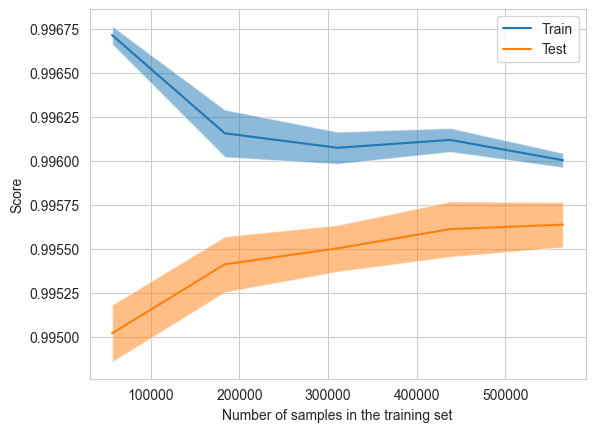

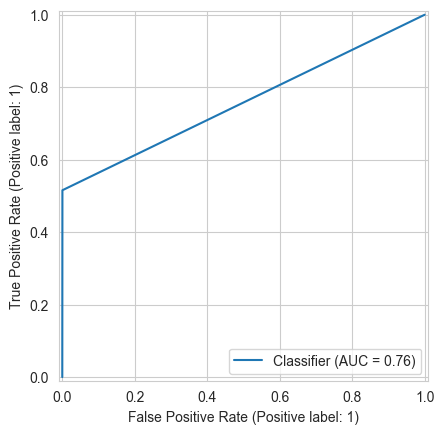

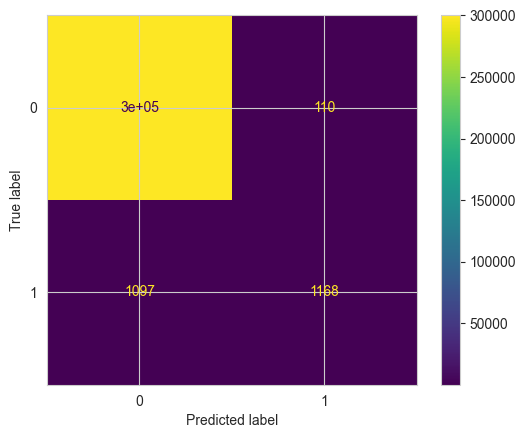

,metric,score
0,f1_score,0.659328
1,precision_score,0.913928
2,recall_score,0.515673


In [37]:
validate(CatBoostClassifier(random_state=seed, task_type='GPU'), is_catboost=True)

In [0]:
validate(XGBClassifier(random_state=seed, device='cuda'))

# Voting ансамбль

In [0]:
estimators = [
    ('hist', HistGradientBoostingClassifier(random_state=seed)),
    ('xgb', XGBClassifier(random_state=seed)),
    ('cat', CatBoostClassifier(random_state=seed))
]

In [0]:
from sklearn.ensemble import VotingClassifier


clf = VotingClassifier(estimators=estimators,
                       n_jobs=-1,
                       voting='soft')
clf

Обучение и тестирование ансамбля

In [0]:
from sklearn.model_selection import KFold


scores = np.zeros(5)
cv = KFold(5)
for fold, (train, test) in enumerate(cv.split(X, y)):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    clf.fit(X_train, y_train)
    
    scores[fold] = f1_score(y_test, clf.predict(X_test))
    print(f'Fold: {fold + 1}, F1 score: {scores[fold]:.5f}')

print(scores, scores.mean())

Метрики ансамбля

In [0]:
from sklearn.metrics import f1_score, precision_score, recall_score
from time import time


metrics = [
    f1_score,
    precision_score,
    recall_score
]

start_time = time()
y_pred = clf.predict(X)
print(f'Calculation time on {y.size} samples: {(time() - start_time):.3f} s')

RocCurveDisplay.from_predictions(y, y_pred)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
pd.DataFrame({
    'metric': [metric.__name__ for metric in metrics],
    'score': [metric(y, y_pred) for metric in metrics]
})

Сравнение предсказанных данных и реальных данных

In [0]:
labels = ['Ушедшие', 'Не ушедшие']

data = [np.count_nonzero(y), y.size - np.count_nonzero(y)]
plt.pie(data, labels=labels)
plt.title('Churn true')
plt.show()

data = [np.count_nonzero(y_pred), y_pred.size - np.count_nonzero(y_pred)]
plt.pie(data, labels=labels)
plt.title('Churn predicted')
plt.show()